### Load packages and dataset

In [1]:
# import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [3]:
# load dataset

bmx_data = pd.read_csv("datasets/BMX_data.csv")
bmx_data.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM
0,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,NaN,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
1,62162,1,12.7,NaN,95.7,NaN,NaN,NaN,94.7,NaN,...,16.6,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,NaN,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,NaN,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,NaN,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN


## Task 1

In [4]:
all_cis = [] #a list of confidence intervals calculated for each sample

# info for plot
all_means = [] #a list of all means calculated for each sample
all_errors = [] #a list of all error terms

n = 1000 #sample size

# pull out weight values from dataset
all_weights = bmx_data["BMXWT"]

# repeat the creation of a sample and calculation of the CI 500 times
for i in range(500):
    
    sample = bmx_data["BMXWT"].sample(n, random_state=i**2)
    sample_mean = np.mean(sample)
    sample_stdev = np.std(sample)
    
    low_ci_bound = sample_mean - 1.96*(sample_stdev/math.sqrt(n))
    high_ci_bound = sample_mean + 1.96*(sample_stdev/math.sqrt(n))
    ci = [low_ci_bound, high_ci_bound]
    all_cis.append(ci)
    
    # info for plot
    all_means.append(sample_mean) #add sample mean to list of all sample means
    all_errors.append(1.96*(sample_stdev/math.sqrt(n))) #add the error term to list of all error terms
    
    
# print the first 10 confidence intervals
print(all_cis[:10])

[[60.284129592673445, 64.35120035656514], [58.93374628894324, 62.83973549243328], [61.638164738040835, 65.52635139099142], [60.30164456188143, 64.18184074713581], [60.27507987578218, 64.23290799074967], [59.397119544203576, 63.41252869700244], [58.95935128630489, 62.92976366791688], [61.108983281338666, 65.04823165307101], [59.01415903454552, 62.87841471926934], [60.94919179241902, 64.87242436919715]]


<p>
<details><summary>Click to show solution</summary><br>
    
```python
all_cis = [] #a list of confidence intervals calculated for each sample

# info for plot
all_means = [] #a list of all means calculated for each sample
all_errors = [] #a list of all error terms

n = 1000 #sample size

# pull out weight values from dataset
all_weights = bmx_data["BMXWT"]

# repeat the creation of a sample and calculation of the CI 500 times
for i in range(500):
    
    sample = all_weights.sample(n, random_state=i**2)
    sample_mean = np.mean(sample)
    sample_stdev = np.std(sample)
    
    low_ci_bound = sample_mean - 1.96*(sample_stdev/math.sqrt(n))
    high_ci_bound = sample_mean + 1.96*(sample_stdev/math.sqrt(n))
    ci = [low_ci_bound, high_ci_bound]
    all_cis.append(ci)
    
    # info for plot
    all_means.append(sample_mean) #add sample mean to list of all sample means
    all_errors.append(1.96*(sample_stdev/math.sqrt(n))) #add the error term to list of all error terms
    
    
# print the first 10 confidence intervals
print(all_cis[:10])
```

</details>
</p>

## Task 2: Plot the confidence intervals

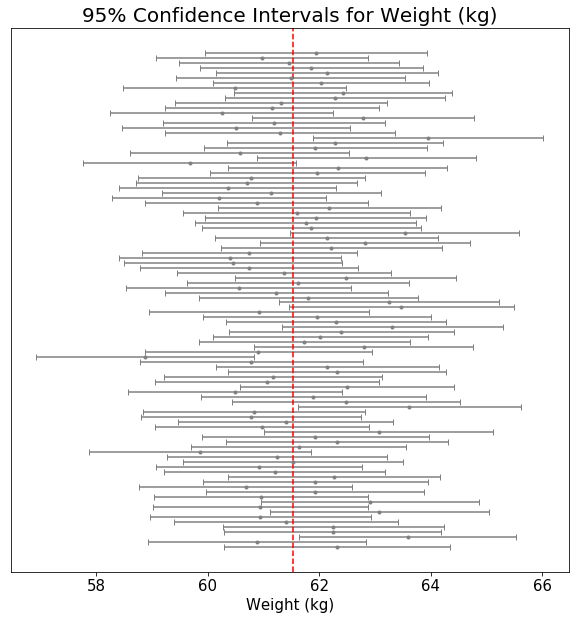

In [5]:
# calculate the population mean weight again
pop_weight_mean = np.mean(all_weights)

# create a plot of 100 of our 500 computed confidence intervals
fig, axs = plt.subplots(figsize=(10,10))
plt.title("95% Confidence Intervals for Weight (kg)", fontsize=20)
errs = plt.errorbar(x=all_means[:100], y=range(100), xerr=all_errors[:100], ls='none', marker='o', markersize=3, fmt='grey', ecolor="grey", capsize=3)
plt.axvline(pop_weight_mean, ls='--', color="red")
axs.tick_params(labelsize=15)
axs.set_xlabel("Weight (kg)", fontsize=15)
plt.yticks([])
plt.show()

## Task 3

In [6]:
# FOR LOOP: repeat the subsetting and analysis of a list of CIs
for s in range(100, 1100, 100):
    
    ci_subset = all_cis[0:s] #choose a subset of CIs
    count = 0 #count of CIs that cover true mean
    
    # FOR LOOP: for each CI in the subset
    for ci in ci_subset:
        if pop_weight_mean > ci[0] and pop_weight_mean < ci[1]:
            # the interval covers the true mean
            count += 1
    
    # Calculate the percentage of CIs that cover the true mean
    percent_covered = (count/500)*100
    print(s, "CI's:", percent_covered)

100 CI's: 19.2
200 CI's: 38.800000000000004
300 CI's: 58.199999999999996
400 CI's: 77.4
500 CI's: 95.8
600 CI's: 95.8
700 CI's: 95.8
800 CI's: 95.8
900 CI's: 95.8
1000 CI's: 95.8
